# <font style="color:rgb(50,120,229)">Video I/O</font>

An image is worth a thousand words. Going by that logic, a video is an entire novel in itself. We have already covered basic image processing in the previous sections. Now it's time to take it further and discuss about how to process videos.

In this module, we will discuss about **Video I/O** - how to **read** and **write** a video in OpenCV.

# <font style="color:rgb(50,120,229)">Some Video Processing Jargon</font>
Let us discuss a few concepts related to videos.

## <font style="color:rgb(50,120,229)">Video Resolution</font>
If you are familiar with YouTube or any other video software, you must know about different types of video resolutions - SD ( Standard Definition ), HD ( High Definition ), UHD or 4K ( Ultra High Definition ). 

These are just names given to the resolution ( basically size ) of the video. It is denoted as `width x height` of the frame. For example, 
* SD is 640x360 or 720x480
* HD is 1280x720 ( also known as 720p)
* Full HD is 1920x1080 ( also known as 1080p)
* UHD is 3840x2160 ( also known as 4K)

## <font style="color:rgb(50,120,229)">Frame Rate or FPS</font>

A video is a sequence of fast moving images. So, the obvious question that follows is how fast are the pictures moving? The measure of how fast the images are transitioning is given by a metric called frames per second (fps). Thus, `fps` gives a measure of the number of unique consecutive images that are displayed each second.

So, when someone says that the video has an FPS value of 40, it means that there are 40 images being displayed every second. Alternatively, there is 25 milliseconds gap between successive frames.

## <font style="color:rgb(50,120,229)">Common Video Formats</font>
Let us discuss in brief the two most widely used video formats for writing video files - AVI ( the veteran ) and MP4 ( the youth ).

### <font style="color:rgb(50,120,229)">AVI</font>
AVI stands for **Audio Video Interleave** and it is a multimedia container format introduced by Microsoft in November 1992. AVI files can contain audio and video data in a file container that allows synchronous audio-with-video playback and supports multiple streaming audio and video.
The AVI format is based on the Resource Interchange File Format (RIFF), a container format used to store multimedia data. It is typically less compressed than other formats i.e larger in comparison to more compressed formats.

### <font style="color:rgb(50,120,229)">MP4</font>
MP4 is a file format created by the Moving Picture Experts Group (MPEG) and it stands for **MPEG (Moving Picture Experts Group)-4**. It is a modern compression extension to store audio, visual and audio-visual data. Though mp4 comprises of “parts” that range from one to twenty, the one most referred to is mp4 part 2.

The original idea was to make a compression that used a minimal bit-rate. However, with larger companies using mp4 the bit-rate increased and is now synonymous with high quality.
The compression decreases screen resolution, effectively decreasing the amount of memory used; making it one of the most common extensions. Mp4 is everywhere- from MP4 videos in university presentations to company advertising films - to be a fit for miscellaneous broadcast platforms flawlessly.

### <font style="color:rgb(50,120,229)">Differences</font>
* One big difference between MP4 and AVI is that AVI won't support HEVC/H.265 or VP9 formats. HEVC and VP9 are UHD video codecs. With the support for both codecs, MP4 can hold 4K Ultra HD videos while AVI is only for HD and Full HD files.
* Also, AVI can't hold subtitles itself, but it can contain SubRip, SubStation Alpha and XSUB via third-party modification.


#### <font style = "color:rgb(50,120,229)">Trivia!</font>
* Most popular programs that use mp4: Quicktime, itunes
* Most popular devices that use mp4: Music/video players, Computers, Cell phones

# <font style="color:rgb(50,120,229)">Read and display a Video in OpenCV</font>

Just like we used [**`cv2.imread`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to read an image stored on our machine, we will use **`cv2.VideoCapture`** to create a [**VideoCapture**](https://docs.opencv.org/4.1.0/d8/dfe/classcv_1_1VideoCapture.html#ac4107fb146a762454a8a87715d9b7c96) object and read from input file (video).

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
<VideoCapture object>	=	cv.VideoCapture(		)
<VideoCapture object>	=	cv.VideoCapture(	filename[, apiPreference]	)
<VideoCapture object>	=	cv.VideoCapture(	index[, apiPreference]	)

```

**Parameters**

- **`filename`** it can be:
    - name of video file (eg. video.avi)
    - or image sequence (eg. img_%02d.jpg, which will read samples like img_00.jpg, img_01.jpg, img_02.jpg, ...)
    -or URL of video stream (eg. protocol://host:port/script_name?script_params|auth). Note that each video stream or IP camera feed has its own URL scheme. Please refer to the documentation of source stream to know the right URL.
- **`apiPreference`**:	preferred Capture API backends to use. Can be used to enforce a specific reader implementation if multiple are available: e.g. cv::CAP_FFMPEG or cv::CAP_IMAGES or cv::CAP_DSHOW.

## <font style="color:rgb(50,120,229)">Create a video reader object </font>
```python
cap = cv2.VideoCapture(args)
```

Three most popular ways of reading videos using the VideoCapture Object are :
1. Using Webcam ( Pass the argument as 0 )
2. From a video File ( Specify the filename as argument )
3. Image sequence ( e.g. image_%03d.jpg )

#### <font style = "color:rgb(200,0,0)">NOTE for Webcam</font>

In most cases, only one camera is connected to the system. So, all we do is pass **`1`** and OpenCV uses the only camera attached to the computer. When more than one camera is connected to the computer, we can select the second camera by passing **`1`**, the third camera by passing **`2`** and so on.

In [1]:
# Import module
import cv2
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

In [3]:
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

## <font style="color:rgb(50,120,229)">How to read frames? </font>
For reading the video frames, we use the **`cap.read`** function which returns a tuple where the first element is a return value and the second element is the frame. We also use additional functions like **`cap.isOpened()`** to check if the camera or the video file has opened correctly.

In [4]:
ret, frame = cap.read()

## <font style="color:rgb(50,120,229)">Display the Video</font>
After reading a video file, we can display the video frame by frame. A frame of a video is simply an image and we display each frame the same way we display images, i.e., we use the function **`cv2.imshow()`**.

Usually, you would use your local system while working with videos instead of Jupyter Notebooks. But since, everything is covered in both modes, we will describe how to display the read frames in two ways. 

1. Using matplotlib imshow on the Notebook itself.
1. Using cv2.imshow in the Local python script

## <font style="color:rgb(50,120,229)">Display the frame using Matplotlib </font>

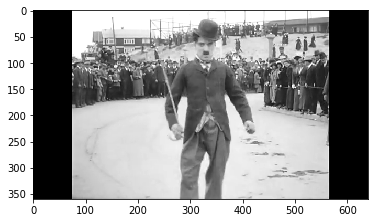

In [5]:
plt.imshow(frame[...,::-1])

## <font style="color:rgb(50,120,229)">Displaying the frames as video [ For Local only ]</font>

As in the case of an image, we use the [**`cv2.waitKey()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) after [**`cv2.imshow()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) function to pause each frame in the video. In the case of an image, we pass **`0`** to the `waitKey` function, but for playing a video, we need to pass a number greater than `0` to the waitKey() function. This is because `0` would pause the frame in the video for an infinite amount of time and in a video we need each frame to be shown only for some finite interval of time, so we need to pass a number greater than `0` to the `waitKey` function. **This number is equal to the time in milliseconds we want each frame to be displayed.**

#### <font style="color:rgb(50,120,229)">waitKey value for Webcam</font>
While reading the frames from a webcam, using `waitKey(1)` is appropriate because the display frame rate will be limited by the frame rate of the webcam even if we specify a delay of 1 ms in waitKey.

#### <font style="color:rgb(50,120,229)">waitKey value for video file</font>
While reading frames from a video that you are processing, it may still be appropriate to set the time delay to 1 ms so that the thread is freed up to do the processing we want to do.

In rare cases, when the playback needs to be at a certain frame rate, we may want the delay to be higher than 1 ms.

**You should try this with the `videoRead.py` file we have provided.**

```python
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    cv2.imshow("Video Output", frame)    
    # Wait for 25 ms before moving on to the next frame
    # This will slow down the video
    cv2.waitKey(25)
    
  # Break the loop
  else: 
    break
```

#### <font style = "color:rgb(200,0,0)">NOTE</font>

Since we are using a Jupyter Notebook, we will use HTML magic command available in Jupyter Notebook to display the video. You can also use the python scripts(`.py` files) which use **`cv2.imshow`** to display the videos in a new window. 

In [6]:
%%HTML
<video controls>
    <source src="https://www.dropbox.com/s/k1zs21f2qehcsum/chaplin.mp4?dl=1" type="video/mp4">
</video>

# <font style="color:rgb(50,120,229)">Get and set properties of VideoCapture</font>

So far we have seen how to read a video. Next, we will see how to extract some properties from video and how to set those properties using **`cap.get(propId)`** and **`cap.set(propId,value)`** respectively. 

Here, **`cap`** is the **`VideoCapture`** object from where we want to extract (or set) the properties, **`propId`** stands for the [Property ID](https://docs.opencv.org/4.1.0/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d) and **`value`** is the value we want to set for the property with id **`propId`**.

Here are some of the common properties and their ID.

| Enumerator | Numerical Value | Property |
| --- | --- | --- |
| **`cv2.CAP_PROP_POS_MSEC`** | `0` | Current position of the video file in milliseconds |
| **`cv2.CAP_PROP_FRAME_WIDTH`** | `3` | Width of the frames in the video stream |
| **`cv2.CAP_PROP_FRAME_HEIGHT`** | `4` | Height of the frames in the video stream |
| **`cv2.CAP_PROP_FPS`** | `5` | Frame rate |
| **`cv2.CAP_PROP_FOURCC`** | `6` | 4-character code of codec |

Let's dig deeper into this with the help of an example.

## <font style="color:rgb(50,120,229)">Getting the video properties</font>

In [7]:
# Let's create the VideoCapture object
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

We can find the frame width and height using **`cap.get(3)`** and **`cap.get(4)`**

In [8]:
width = cap.get(3)
height = cap.get(4)

In [9]:
print(width,height)

640.0 360.0


In [10]:
# Read the first frame
ret, frame = cap.read()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

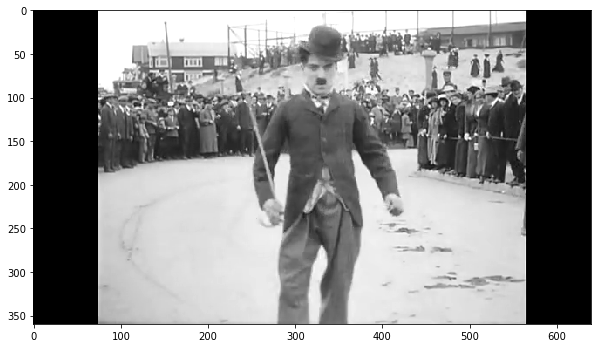

In [13]:
# Display the frame
plt.imshow(frame[...,::-1])

## <font style="color:rgb(50,120,229)">Setting the video properties</font>

We can use the `set` method to change the properties of the video device. For example we can change the height and width of the input video while reading. 

#### <font style = "color:rgb(200,0,0)">Note </font>

It might happen that the set property function gives unexpected results. This is because the setting of property may be disabled for the file or webcam. For example, you might not be able to set the properties for the video file that we are working with, but you can set the width and height of your webcam input. 

Even for the webcam, it is not possible to set arbitrary values. Whatever values you set should be supported by the device. ( For example, the default resolution of my webcam is 720x1280. If I want to set it to 200x200, it might not happen and get set to something else, say 640x480, which is supported by the webcam. )

In [14]:
# Width
ret = cap.set(3, 320)
print(ret)
# Height
ret = cap.set(4, 180)
print(ret)

False
False


It prints `false` which means that the video property we wanted to set was not done correctly.

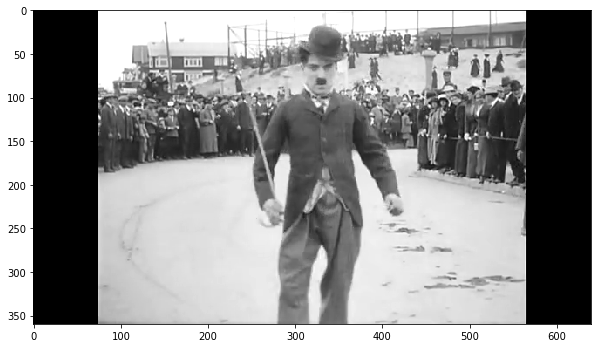

In [15]:
ret, frame = cap.read()
plt.imshow(frame[...,::-1])

In [16]:
cap.release()

So, we can't change the frame size for the video file.

Try it on your webcam and see if you can change frame size before reading

# <font style="color:rgb(50,120,229)">Write a Video in OpenCV</font>

After we are done with capturing and processing the video frame by frame, the next step we would want to do is to save the video.

For images, it is straightforward. We just need to use [**`cv2.imwrite()`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) and specify an image format(jpg/png). But for videos, some more info is required. 

The steps are as follows:

__1__. Create a [**`VideoWriter`**](https://docs.opencv.org/4.1.0/dd/d9e/classcv_1_1VideoWriter.html#ac3478f6257454209fa99249cc03a5c59) object

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
<VideoWriter object>	=	cv.VideoWriter(		)
<VideoWriter object>	=	cv.VideoWriter(	filename, fourcc, fps, frameSize[, isColor]	)
<VideoWriter object>	=	cv.VideoWriter(	filename, apiPreference, fourcc, fps, frameSize[, isColor]	)
```

**Parameters**
- **`filename`**: Name of the output video file.
- **`fourcc`**:	4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
- **`fps`**:	Framerate of the created video stream.
- **`frameSize`**:	Size of the video frames.
- **`isColor`**:	If it is not zero, the encoder will expect and encode color frames, otherwise it will work with grayscale frames (the flag is currently supported on Windows only).

**2**. Write frames to the object in a loop.

**3**. Close and release the object.


### <font style="color:rgb(50,120,229)">FourCC Code</font>

[FourCC](https://en.wikipedia.org/wiki/FourCC) is a 4-byte code used to specify the video codec. The list of available codes can be found at [fourcc.org](http://fourcc.org/). There are many FOURCC codes available, but in this lecture we would work only with MJPG.

#### <font style = "color:rgb(200,0,0)">Note</font>
Only a few of the FourCC codes listed above will work on your system based on the availability of the codecs on your system. Sometimes, even when the specific codec is available, OpenCV may not be able to use it. **MJPG is a safe choice.**

In [17]:
# Let's create the VideoCapture object
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

In [18]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
# The output is stored in 'outputChaplin.mp4' file.
out = cv2.VideoWriter('outputChaplin.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

In [19]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    
    # Write the frame into the file 'outputChaplin.mp4'
    out.write(frame)
    
    # Wait for 25 ms before moving on to the next frame
    # This will slow down the video
    cv2.waitKey(25)
    
  # Break the loop
  else: 
    break

In [20]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out.release()